## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) #To make sure all the columns are displayed

##   Data Exploration



In [2]:
dataset = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
dataset.head() #Check the head of the dataframe

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
dataset.info() #Total 660 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']

In [ ]:
for feature in features:
    sns.distplot(dataset[feature]) #Checking the distributions of the interactions
    plt.show()

In [7]:
dataset.drop(['Sl_No','Customer Key'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


 1. There are no missing values
 2. A customer carries ~5 CreditCards on an average and visits ~2 times on an average
 3. There are customers who do not visit banks / online/calls 


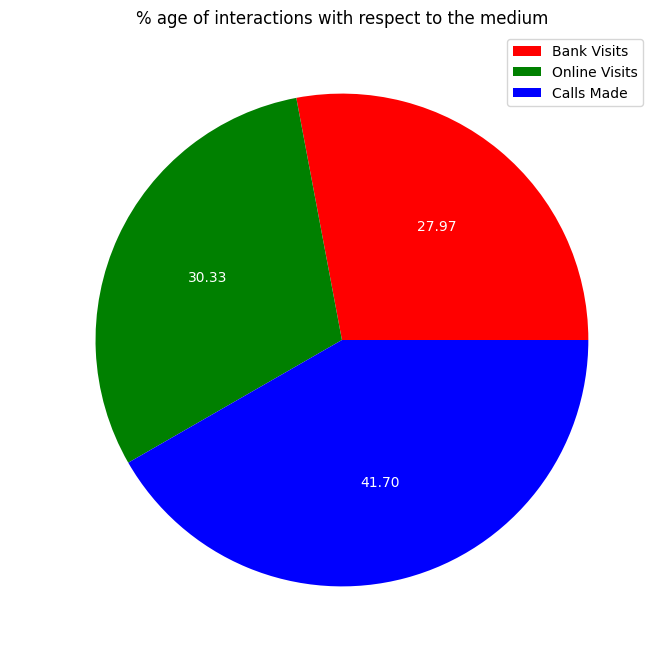

In [8]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in features:
    feature_perc.append((data[feature].sum()/data['Total_interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',colors='rgb',textprops=dict(color="w"))
plt.legend()
plt.title("% age of interactions with respect to the medium")
plt.show()



## Perform EDA  ,Create Visualizations and present insights

In [9]:
#Finding duplicate rows
dataset[dataset.duplicated(subset=None, keep='first')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


* There are no duplicate entries in the dataset

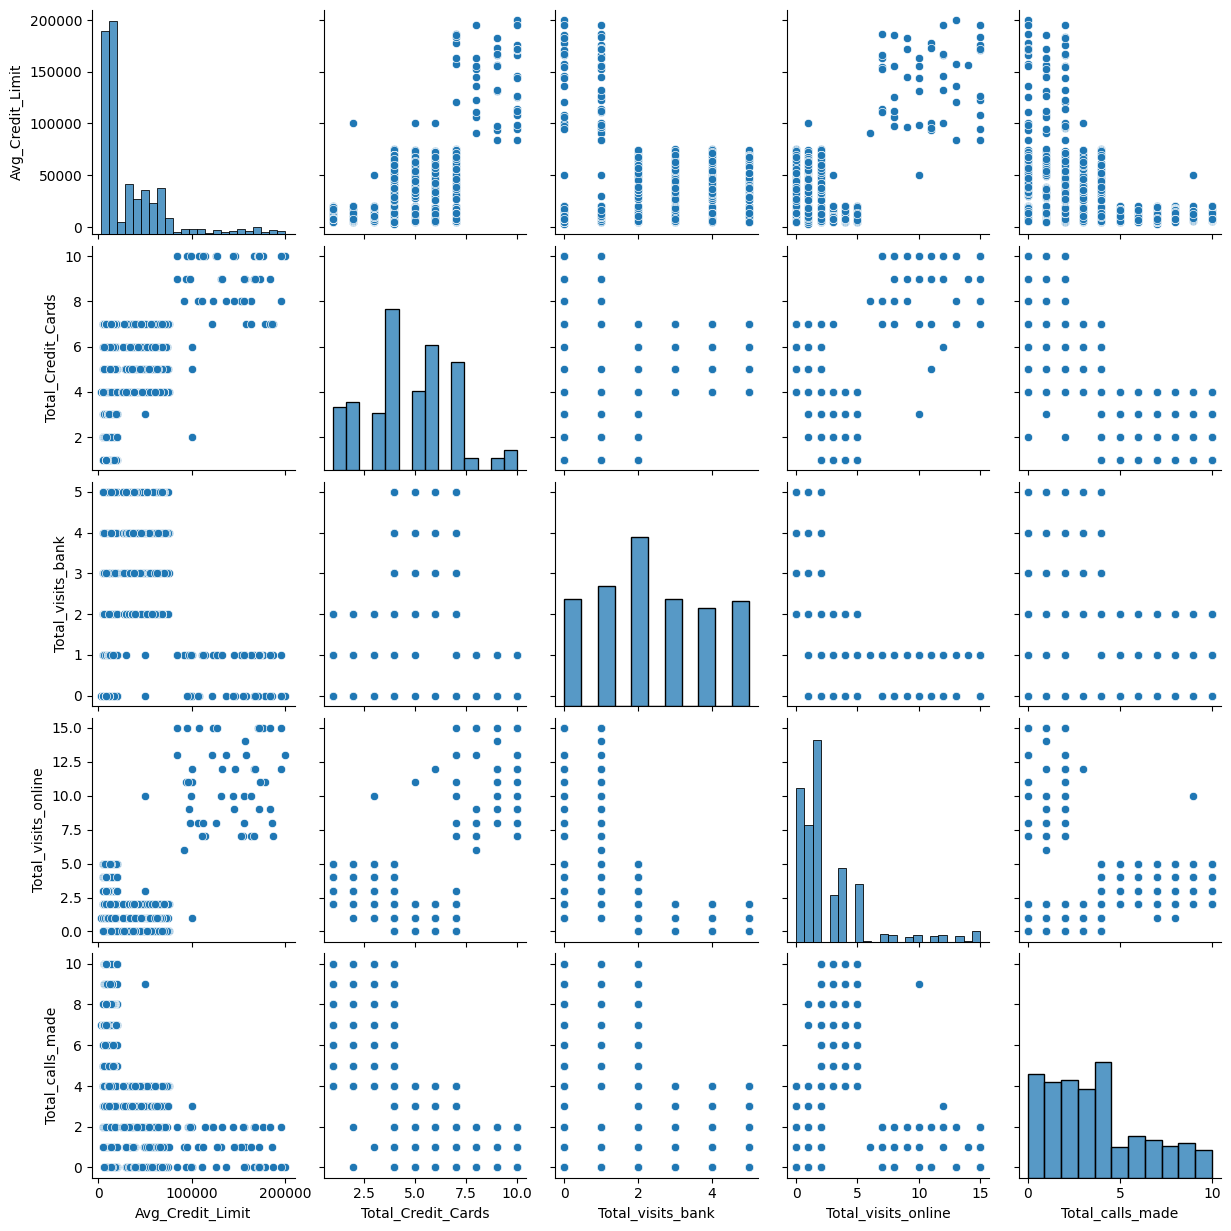

In [10]:
data = dataset.drop(['Sl_No','Customer Key'],axis=1).copy()
sns.pairplot(data) #Pairplot from seaborn library

In [11]:
data.corr() #Checking the correlation of the features

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


### Total_Credit_Cards v/s Avg_Credit_Limit

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

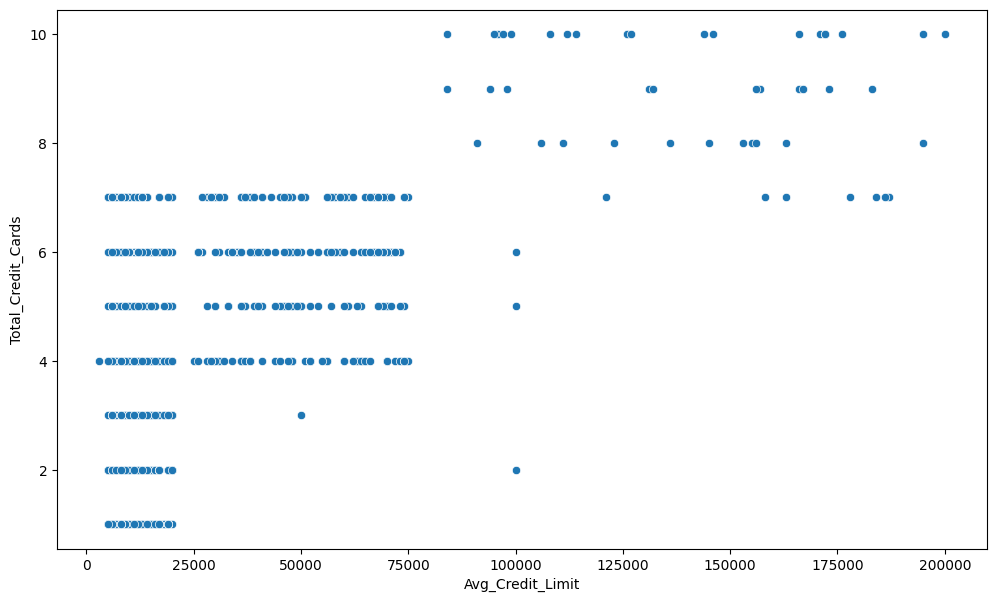

In [12]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=dataset)

1.There are two clusters:
    **Customers with Average Credit Limit <100000 And Customers with Average Credit Limit < 75000**

### Avg_Credit_Limit vs Total_visits_banks


<Axes: xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

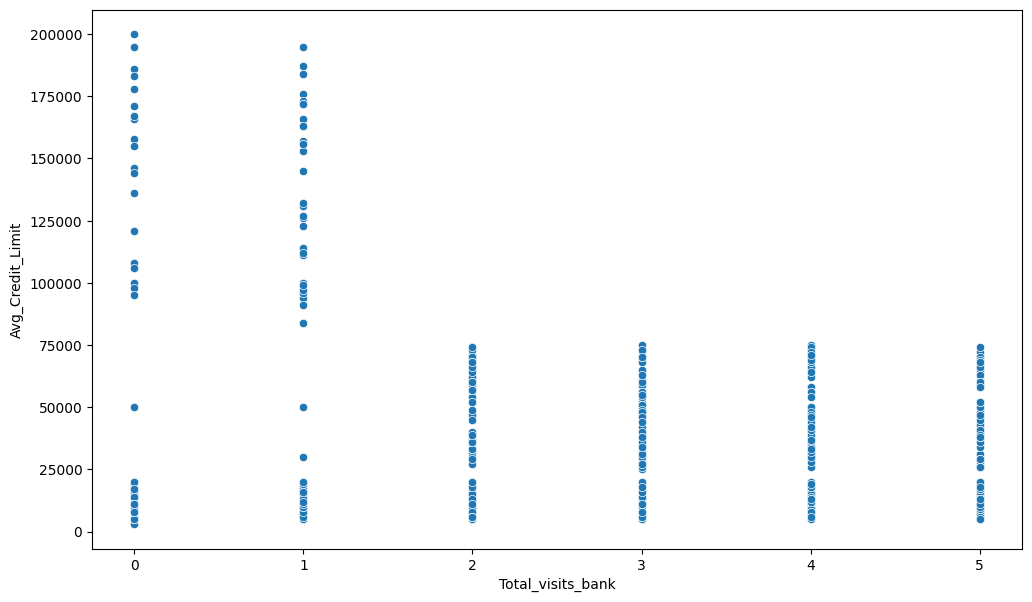

In [13]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_bank',y='Avg_Credit_Limit',data=dataset) 

**People with Average Limit > ~70000 make 0 to 1 visits to the bank**
**People with Average Credit Limit < ~70000 visit frequently i.e. 2 to 5 times**

### Avg_Credit_Limit v/s Total_visits_online 

<Axes: xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

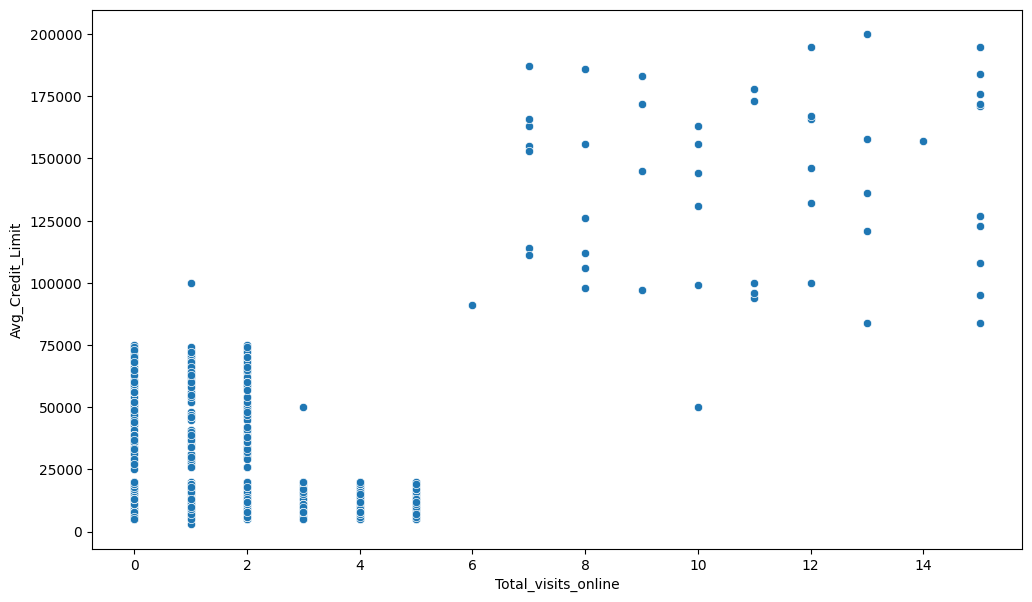

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Avg_Credit_Limit',data=dataset) 

**There clearly seems to be differentiated 2 clusters on the basis of above two features**

**People with Average Credit Limit >75000 visits more frequently online(>7 times)**

###  Total_Credit_Cards v/s Total_visits_online graph

<Axes: xlabel='Total_visits_online', ylabel='Total_Credit_Cards'>

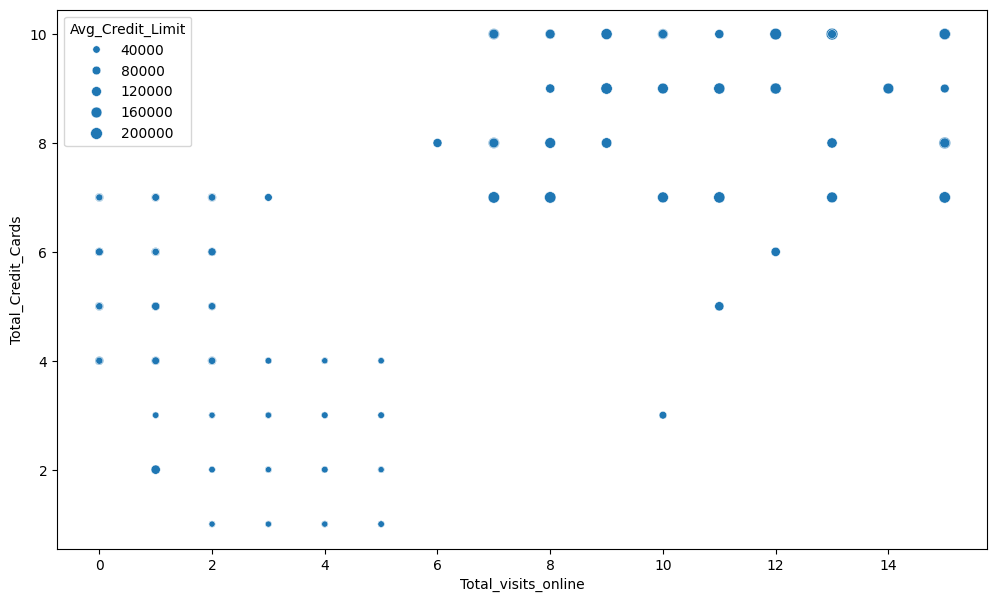

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_Credit_Cards',size='Avg_Credit_Limit',data=dataset) 

**There seems to be two differentiable clusters on the basis of above two features**

**Customers with more than 7 credit cards and with Average Limit > 80000 visits  online more frequently**

## Total_visits_online v/s Total_calls_made


<Axes: xlabel='Total_visits_online', ylabel='Total_calls_made'>

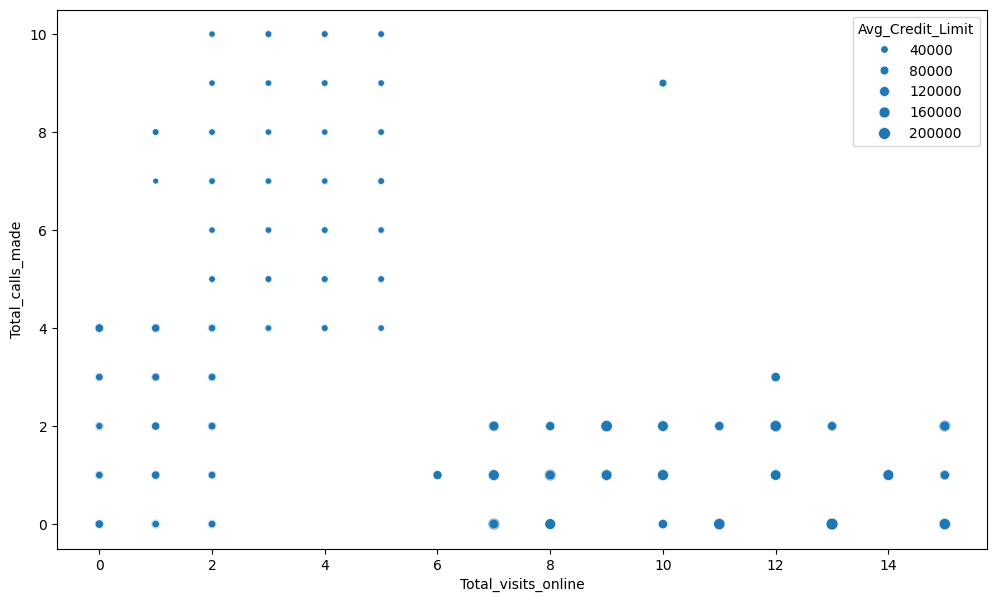

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_calls_made',size='Avg_Credit_Limit',data=dataset) 

#Dots are sized relative to the Avg_Credit_Limit

**There seems to be cleary two clusters on the above two features**

**Customers who visit less frequently online make more phone calls**

**People with Average credit limit >80000 make more frequent online visits**

### Creating a new feature with total interaction with banks  for analysis

In [17]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_interactions'>

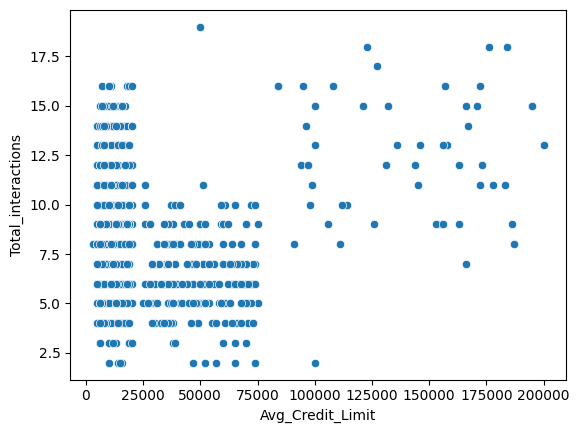

In [18]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_interactions',data=data)

**Customers can be segmented on the basis of Total interactions or total complaints with bank and the average credit limit**

## Execute KMeans

In [19]:
X = dataset.iloc[:,2:].values #Selecting the features

In [20]:
X.shape 

(660, 5)

**As there is a difference in magnitude of Credit Limit and other features, we will scale the features**

**As there are not any negative values, we can use MinMaxScaler**

In [21]:
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler
scaler= MinMaxScaler() #Initialising the instance of the scaler
scaled_features = scaler.fit_transform(X) #Storing the scaled version of features in scaled_features

In [22]:
from sklearn.cluster import KMeans #Importing KMeans from sklearn

In [23]:
## Writing a for loop to plot the graph for within cluster sum of squares

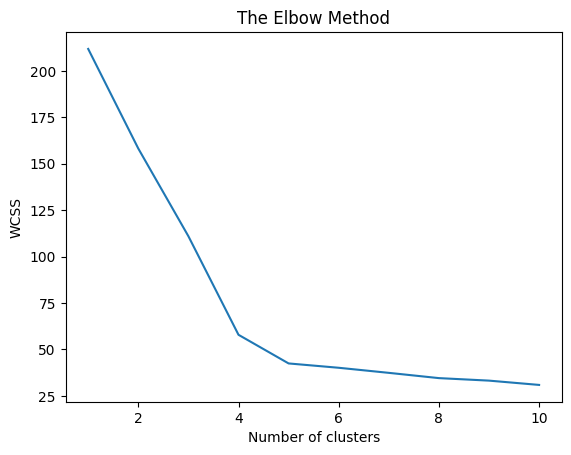

In [24]:
wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Initialising 
    kmeans.fit(scaled_features) #Fitting on scaled features
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

**As there is smooth descent afer n_clusters = 3 we will choose number of clusters as 3**

In [25]:
## Training the K-Means model on the dataset

In [26]:
!pip install yellowbrick

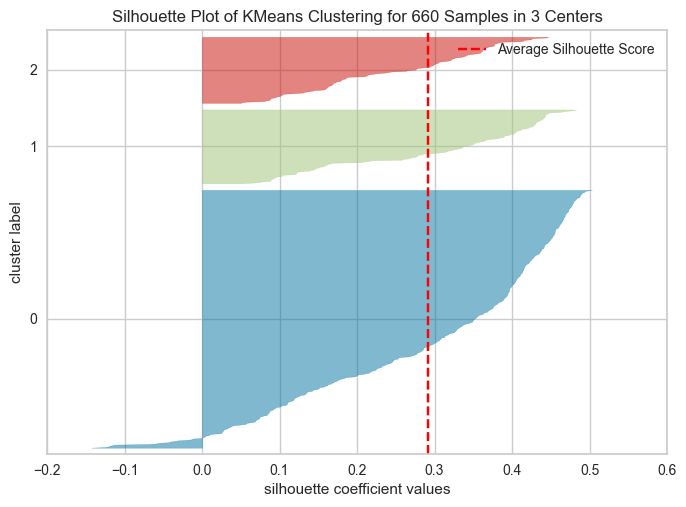

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #Initialising 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [29]:
print(y_kmeans)

[2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 

In [30]:
Segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
Segment

,Segment
0,2
1,2
2,2
3,0
4,2
...,...
655,2
656,2
657,1
658,1


In [31]:
data=dataset.copy()
data=pd.concat([data,Segment],axis=1)

In [32]:
features = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [33]:
## Analyzing the results

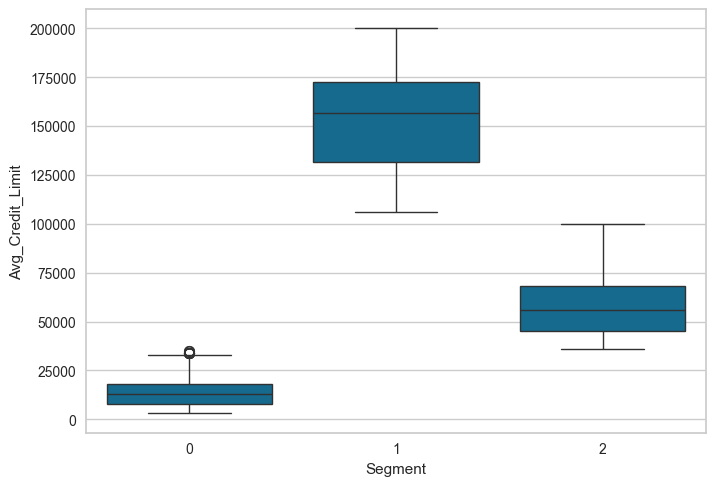

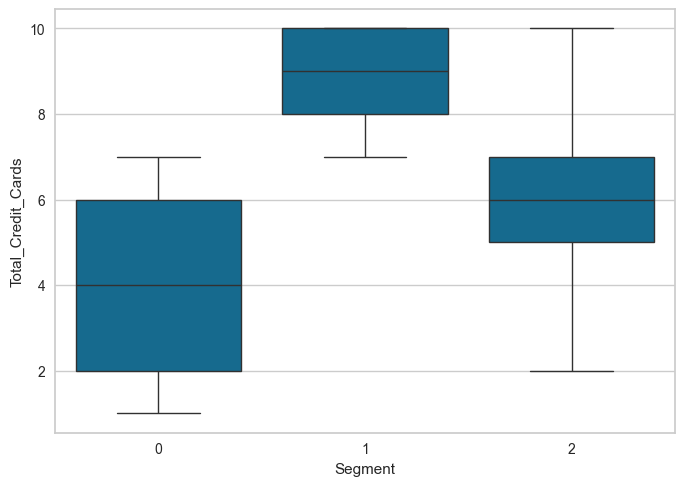

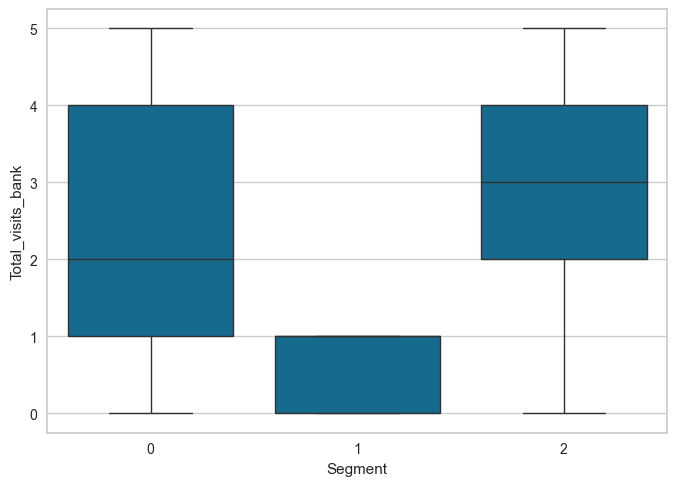

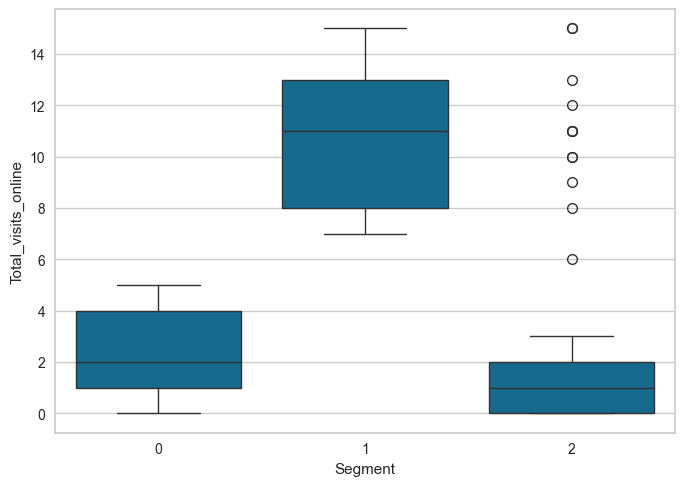

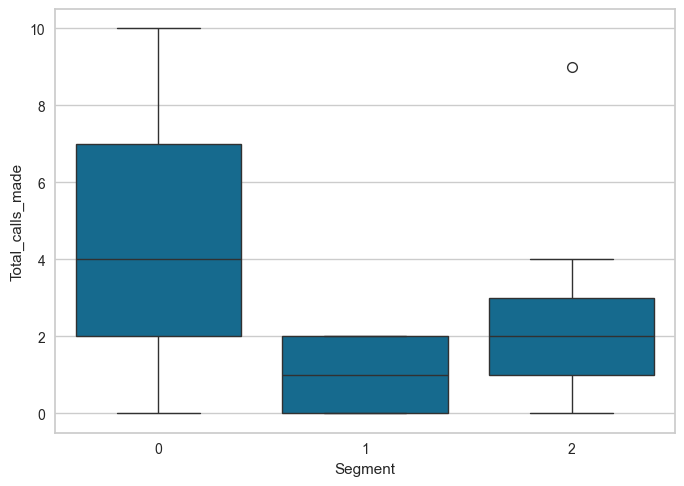

In [34]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y=feature,data=data)
    plt.show()

#  Hierarchical Clustering

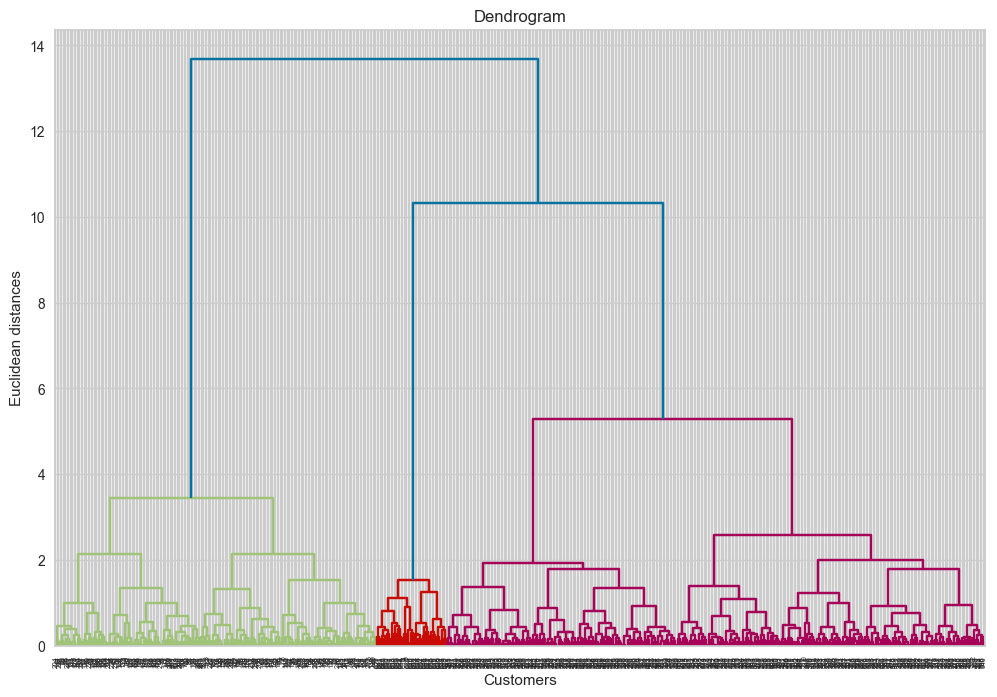

In [35]:
import scipy.cluster.hierarchy as sch #import the library
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Based on the dendrogram number of clusters = 3**

In [36]:
from scipy.cluster.hierarchy import cophenet

In [37]:
cophenet_ =np.mean(cophenet(sch.linkage(scaled_features)))
cophenet_

0.21442781737262284

In [38]:
from sklearn.cluster import AgglomerativeClustering #Importing lib
hc = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage = 'ward') #Euclidean distance, and ward linkage
y_hc = hc.fit_predict(X) #TrainingTheModel

In [39]:
y_hc #Predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
df_yhc = pd.DataFrame(y_hc,columns=['HCluster'])

In [41]:
data= dataset.copy()
data = pd.concat([data,df_yhc],axis=1)
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HCluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


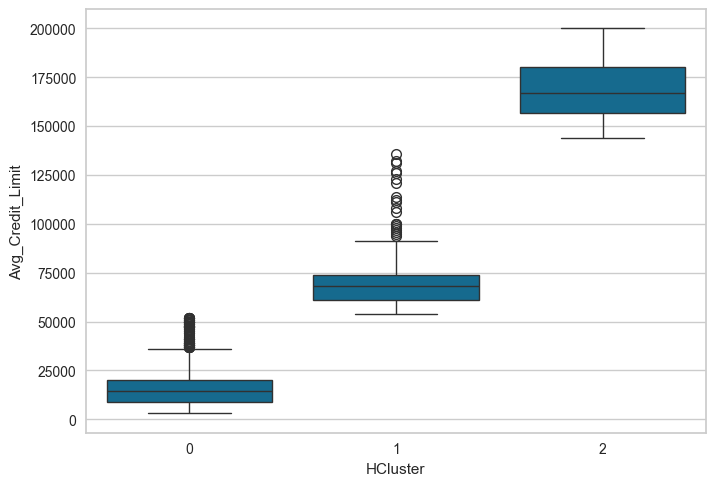

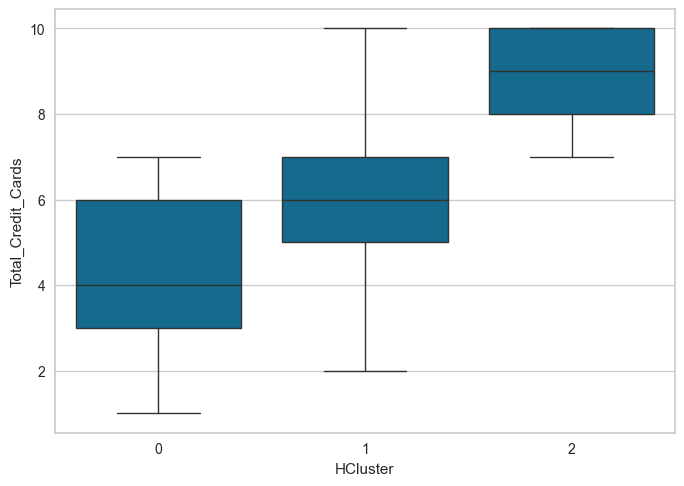

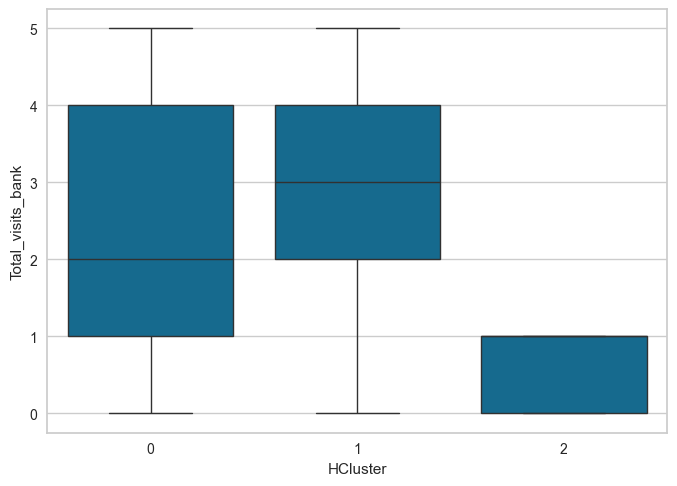

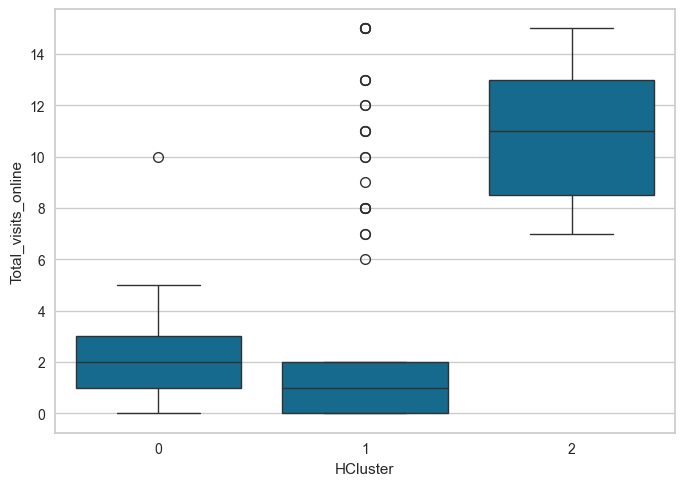

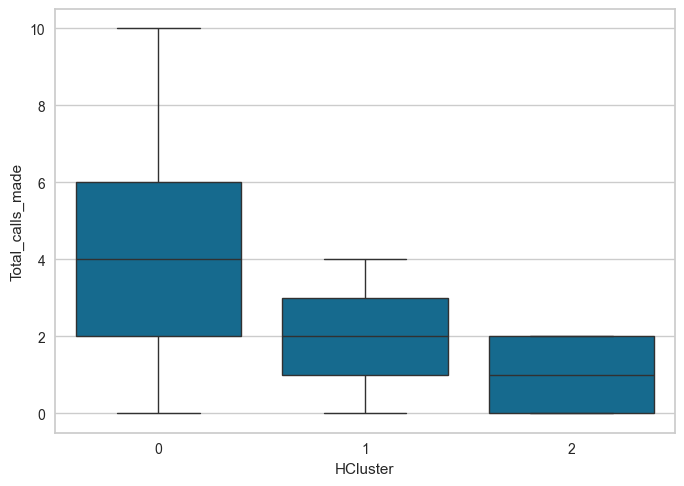

In [42]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='HCluster',y=feature,data=data)
    plt.show()

## Calculate avg silhoutte scores

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
kmeans_score= silhouette_score(scaled_features,y_kmeans)
kmeans_score

0.1467806616998487

In [45]:
hc_score= silhouette_score(scaled_features,y_hc)
hc_score

0.11914770655113151

In [46]:
print("The silhoutte score of kmeans and Hierarchical Cluster are {} and {} respectively".format(kmeans_score,hc_score))


The silhoutte score of kmeans and Hierarchical Cluster are 0.1467806616998487 and 0.11914770655113151 respectively
